In [12]:
# Import our libraries 
from prophet import Prophet
from datetime import timedelta
# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np
# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# Use inline so our visualizations display in notebook
%matplotlib inline

### Kevin's RF for CO2

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data
climate_df = pd.read_csv('../data/realistic_climate_change_impacts.csv')
energy_df = pd.read_csv('../data/energy.csv')

climate_df['Year'] = pd.to_datetime(climate_df['Date']).dt.year
merged_df = pd.merge(climate_df, energy_df, on=['Country', 'Year'])

# Define features and target
features = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita']
target = 'CO2_emission'

# Clean the data: drop rows with missing values in key columns
merged_df_cleaned = merged_df.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = merged_df_cleaned[features]
y = merged_df_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Mean Squared Error:", mse)
print("Feature Importances:\n", importance_df)


Mean Squared Error: 4.343267669893687e-24
Feature Importances:
                        Feature  Importance
0           Energy_consumption    0.936130
1            Energy_production    0.018050
2                          GDP    0.017570
4  Energy_intensity_per_capita    0.014986
3                   Population    0.013265


### Sabeha's Time Series Forecast for Energy Consumption with Prophet

/tmp/ipykernel_1248020/238219499.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
/tmp/ipykernel_1248020/238219499.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['y'] = country_data['Energy_consumption']
00:44:22 - cmdstanpy - INFO - Chain [1] start processing
00:44:22 - cmdstanpy - INFO - Chain [1] done processing
/home/skhan/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is d

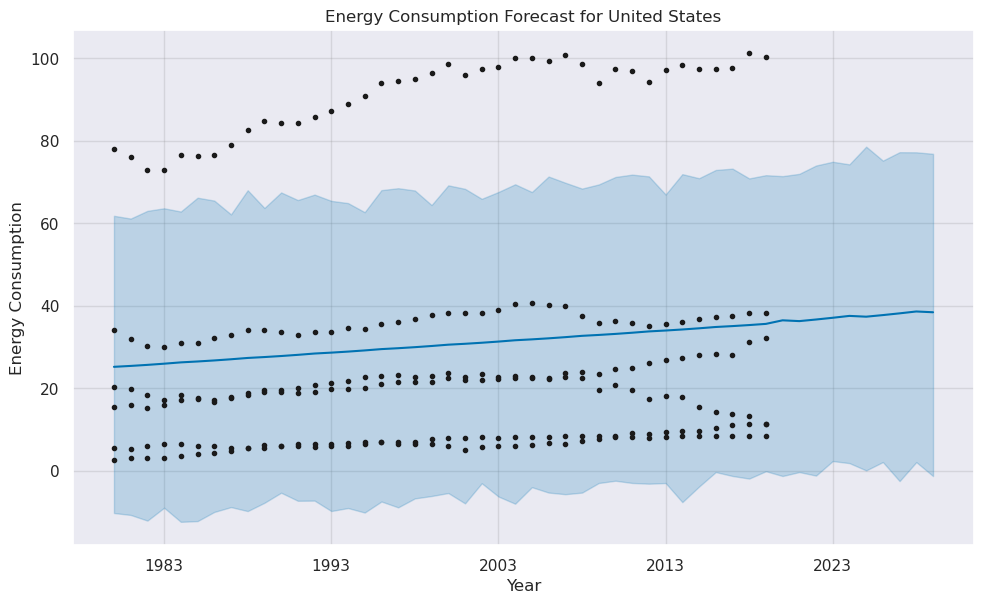

/home/skhan/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


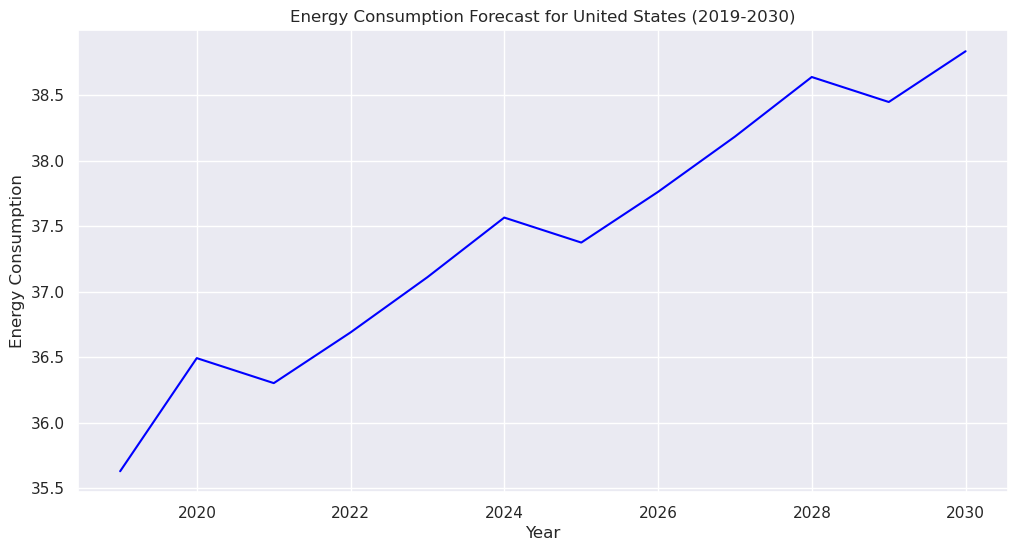

In [14]:
df_energy = pd.read_csv('../data/energy.csv')
df_energy.head()
# replace with your desired country
country = 'United States'

country_data = df_energy[df_energy['Country'] == country]

# Prepare the data for Prophet
country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
country_data['y'] = country_data['Energy_consumption']

# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(country_data)

# Make future dataframe - Full Forecast
future = model.make_future_dataframe(periods=10, freq='Y')

# Predict future values
forecast = model.predict(future)

# Plot the forecast 
fig = model.plot(forecast)  

#plt.gca().lines[1] 
#plt.gca().collections[0]
plt.title(f'Energy Consumption Forecast for {country}')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


future = model.make_future_dataframe(periods=11, freq='Y')  # 11 years from 2019 to 2030

# Predict future values 
forecast = model.predict(future)

# Filter the forecast for 2019-2030
forecast_2019_2030 = forecast[forecast['ds'].dt.year >= 2019]

# Plot the forecast for 2019-2030
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(forecast_2019_2030['ds'], forecast_2019_2030['yhat'], color='blue')
plt.title(f'Energy Consumption Forecast for {country} (2019-2030)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

/tmp/ipykernel_1248020/3757076646.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
/tmp/ipykernel_1248020/3757076646.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['y'] = country_data['Energy_consumption']
00:44:23 - cmdstanpy - INFO - Chain [1] start processing
00:44:23 - cmdstanpy - INFO - Chain [1] done processing


Random Forest MSE: 107335.83231045678


/home/skhan/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


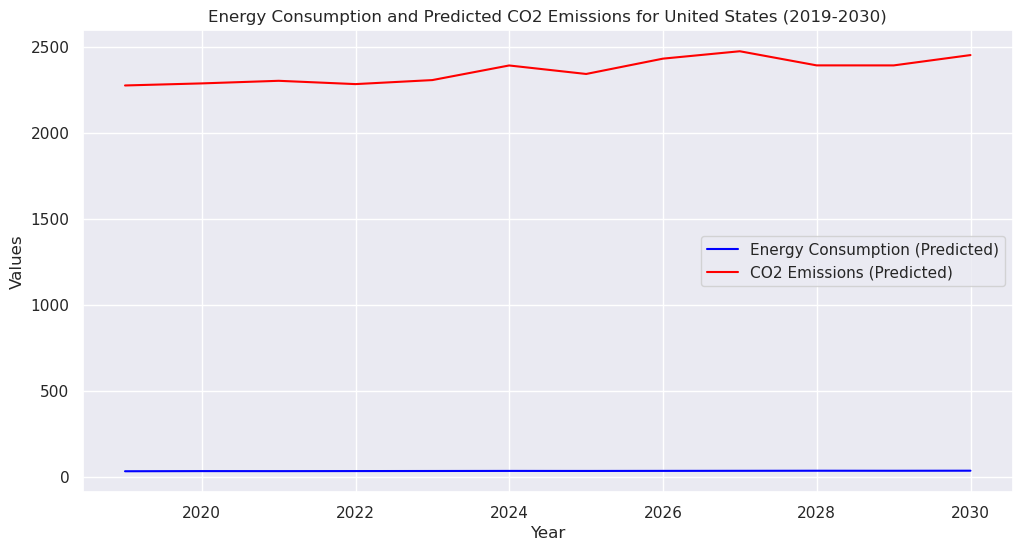

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filter data for the selected country
country = 'United States'
country_data = df_energy[df_energy['Country'] == country]

# Prepare Random Forest Regressor data
X = country_data[['Energy_consumption']]  # Feature
y = country_data['CO2_emission']         # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

# Prepare the data for Prophet
country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
country_data['y'] = country_data['Energy_consumption']

# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(country_data)

# Make future dataframe and predict energy consumption
future = model.make_future_dataframe(periods=11, freq='Y')  # Forecast from 2019-2030
forecast = model.predict(future)

# Filter the forecast for 2019-2030
forecast_2019_2030 = forecast[forecast['ds'].dt.year >= 2019]

# Rename 'yhat' to match the training feature name 'Energy_consumption'
forecast_2019_2030 = forecast_2019_2030.rename(columns={'yhat': 'Energy_consumption'})

# Predict CO2 emissions using the renamed column
forecast_2019_2030['Predicted_CO2'] = rf_model.predict(forecast_2019_2030[['Energy_consumption']])

# Plot Energy Consumption and Predicted CO2 Emissions
plt.figure(figsize=(12, 6))

# Plot Energy Consumption forecast
plt.plot(
    forecast_2019_2030['ds'], 
    forecast_2019_2030['Energy_consumption'], 
    label='Energy Consumption (Predicted)', 
    color='blue'
)

# Plot CO2 Emissions prediction
plt.plot(
    forecast_2019_2030['ds'], 
    forecast_2019_2030['Predicted_CO2'], 
    label='CO2 Emissions (Predicted)', 
    color='red'
)

# Add labels, legend, and grid
plt.title(f'Energy Consumption and Predicted CO2 Emissions for {country} (2019-2030)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()


In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor


# # Scale CO2 emissions to make the graph more reasonable, if needed
# forecast_2019_2030['Predicted_CO2'] = forecast_2019_2030['Predicted_CO2'] / 1000  # Scaling to tonnes

# # Plot Energy Consumption and Predicted CO2 Emissions
# plt.figure(figsize=(12, 6))

# # Plot Energy Consumption forecast
# plt.plot(
#     forecast_2019_2030['ds'], 
#     forecast_2019_2030['Energy_consumption'], 
#     label='Energy Consumption (Predicted)', 
#     color='blue'
# )

# # Plot CO2 Emissions prediction
# plt.plot(
#     forecast_2019_2030['ds'], 
#     forecast_2019_2030['Predicted_CO2'], 
#     label='CO2 Emissions (Predicted)', 
#     color='red'
# )

# # Set Y-axis limits for better comparison (adjust as needed)
# plt.ylim([0, max(forecast_2019_2030['Predicted_CO2'].max(), forecast_2019_2030['Energy_consumption'].max())])

# # Add labels, legend, and grid
# plt.title(f'Energy Consumption and Predicted CO2 Emissions for {country} (2019-2030)')
# plt.xlabel('Year')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()


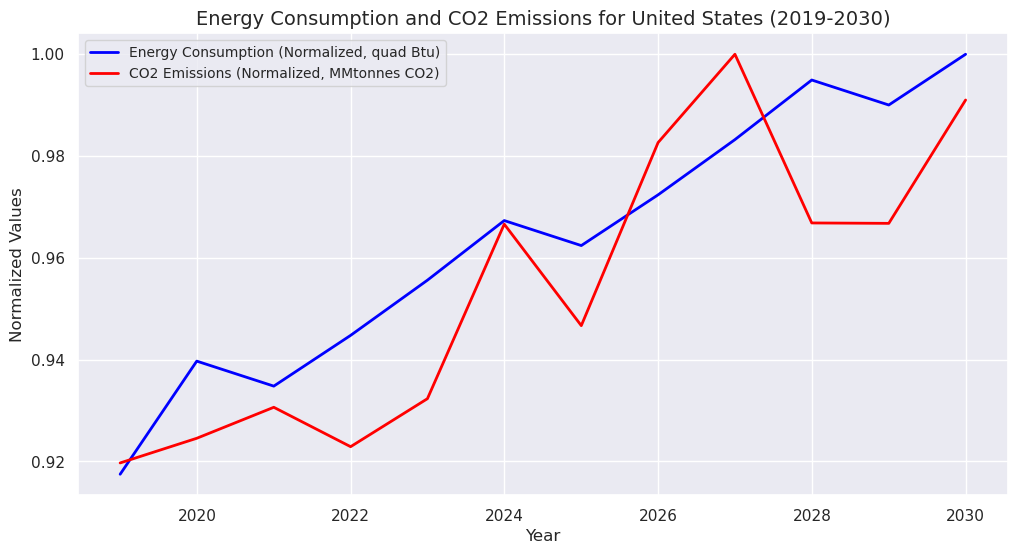

In [18]:
# Normalize values for better comparison
forecast_2019_2030['Energy_norm'] = (
    forecast_2019_2030['Energy_consumption'] / forecast_2019_2030['Energy_consumption'].max()
)
forecast_2019_2030['CO2_norm'] = (
    forecast_2019_2030['Predicted_CO2'] / forecast_2019_2030['Predicted_CO2'].max()
)

# Plot both Energy Consumption and CO2 Emissions
plt.figure(figsize=(12, 6))

# Plot normalized Energy Consumption
plt.plot(
    forecast_2019_2030['ds'],
    forecast_2019_2030['Energy_norm'],
    label='Energy Consumption (Normalized, quad Btu)',
    color='blue',
    linewidth=2,
)

# Plot normalized CO2 Emissions
plt.plot(
    forecast_2019_2030['ds'],
    forecast_2019_2030['CO2_norm'],
    label='CO2 Emissions (Normalized, MMtonnes CO2)',
    color='red',
    linewidth=2,
)

# Titles, labels, and legend
plt.title(f'Energy Consumption and CO2 Emissions for {country} (2019-2030)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()
